In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import os

In [41]:
os.listdir(r'C:\Users\prachi\Desktop\Python\uber\uber csv files')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jul14 (1).csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14 (1).csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [42]:
file=os.listdir(r'C:\Users\prachi\Desktop\Python\uber\uber csv files')[-7:]
file

['uber-raw-data-apr14.csv',
 'uber-raw-data-jul14 (1).csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14 (1).csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [43]:
file.remove('uber-raw-data-jul14 (1).csv')

In [44]:
file

['uber-raw-data-apr14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14 (1).csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [45]:
file.remove('uber-raw-data-jun14 (1).csv')

In [46]:
file

['uber-raw-data-apr14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [47]:
path=r'C:\Users\prachi\Desktop\Python\uber\uber csv files'

final=pd.DataFrame()
for fil in file:
    df=pd.read_csv(path+"/"+fil,encoding='utf-8')
    final=pd.concat([df,final])

In [48]:
final.shape

(3705052, 4)

In [49]:
df=final.copy()

In [50]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [51]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [55]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [56]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [57]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [58]:
df['weekday']=df['Date/Time'].dt.day_name()

In [59]:
df['day']=df['Date/Time'].dt.day

In [60]:
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [61]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [62]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [90]:
#!pip install plotly

In [64]:
import plotly.express as px

In [65]:

px.bar(x=df['weekday'].value_counts().index,
       y=df['weekday'].value_counts()
      )

(array([170901.,  81367., 185720., 444740., 262367., 298459., 677169.,
        548357., 474435., 561537.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

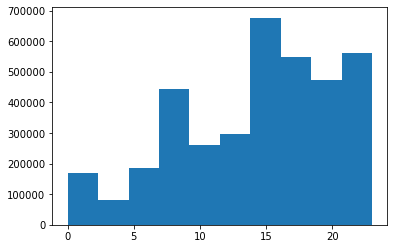

In [66]:
plt.hist(df['hour'])

In [67]:
df['month'].unique()

array([9, 5, 6, 7, 4], dtype=int64)

In [74]:
for i,month in enumerate(df['month'].unique()):
    print(i,end=" ")
    print(month)

0 9
1 5
2 6
3 7
4 4


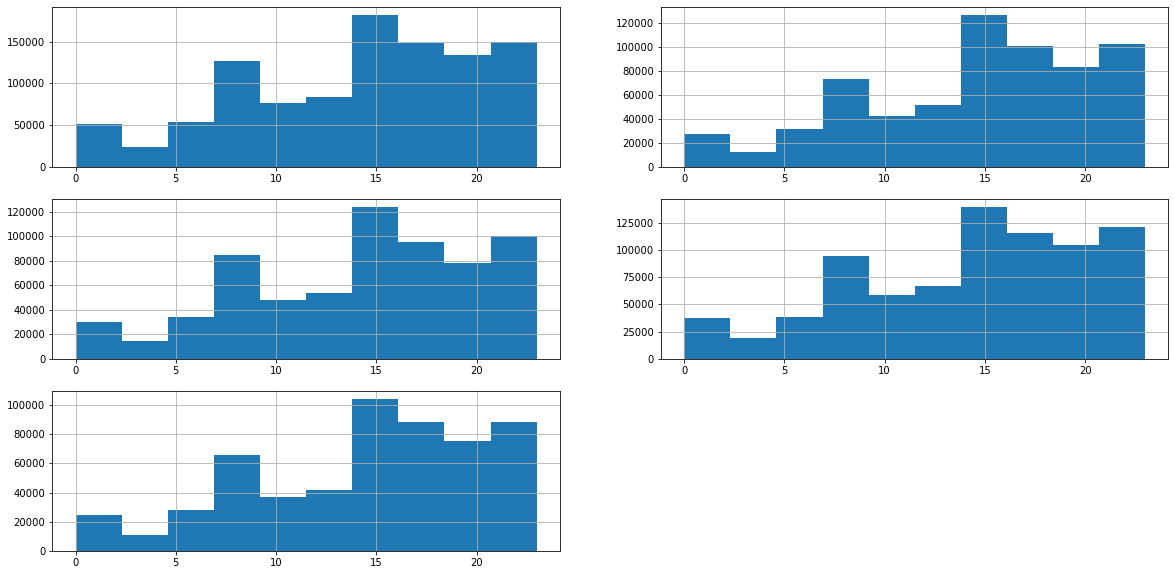

In [76]:
plt.figure(figsize=(20,10))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist()

In [70]:
df['weekday'].value_counts()

Thursday     631028
Friday       592465
Wednesday    581232
Tuesday      556665
Saturday     513889
Monday       449839
Sunday       379934
Name: weekday, dtype: int64

### which month has maximum rides

In [91]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

ModuleNotFoundError: No module named 'chart_studio'